# Scales, axes and legends

## Intro

Each scale is a function from a **region in data space** (the domain of the scale) to a **region in aesthetic space** (the range of the scale). The axis or legend is the inverse function: it allows you to convert visual properties back to data. 

Scales control the mapping from data to aesthetics. They take your data and turn it into something that you can see, like size, colour. Scales also provide the tools that let you read the plot: the axes and legends.

- [basics of working with scales](#Modifying-scales)
- [common parameters for axes and legend](#Guides:-legends-and-axes)
- [more about legends](#Legends)
- [use limits](#Limits)
- [different types of scales](#Scales-toolbox)

## Modifying scales

A scale is required for every aesthetic used on the plot. When you write:

```R
ggplot(mpg, aes(displ, hwy)) + 
geom_point(aes(colour = class))
```

What actually happens is this:

```R
ggplot(mpg, aes(displ, hwy)) + 
geom_point(aes(colour = class)) +
scale_x_continuous() + 
scale_y_continuous() + 
scale_colour_discrete()
```

To override the defaults, we just add them using `+`, kind of misleading.

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)

# multiplot function from Cookbook for R by Winston Chang
# modified by Yuanxing Cheng
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180, width=0) {
    library(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)
    if (width>0){
        options(repr.plot.width=width, repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)
    } else{
        options(repr.plot.width=min(9,3*ncol), repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)   
    }

    # If layout is NULL, then use 'ncol' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of column
        layout <- matrix(
            seq(1, ncol * ceiling(numPlots/ncol)),
            ncol = ncol, nrow = ceiling(numPlots/ncol),
            byrow=TRUE # set byrow=TRUE will make the subplots listed by row
        )
    }

    if (numPlots==1) {
        print(plots[[1]])
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(
                plots[[i]],
                vp = viewport(
                    layout.pos.row = matchidx$row,
                    layout.pos.col = matchidx$col
                )
            )
        }
    }
}
myTheme = theme(
    plot.title = element_text(size = rel(0.5)), 
    axis.title = element_text(size = rel(0.8)), 
    legend.title = element_text(size = rel(0.8)),
    legend.key.size = unit(2.2,'mm')
)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


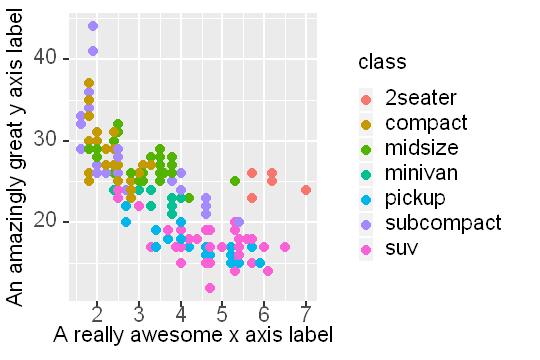

In [2]:
ggplot(mpg, aes(displ, hwy)) + 
geom_point(aes(colour = class)) + 
scale_x_continuous("A really awesome x axis label") +
scale_y_continuous("An amazingly great y axis label")+myTheme

About the name of the `scale_()` function, add `_` to the between three components

1. `scale`
2. The name of the aesthetic (e.g., `colour`, `shape` or `x`)
3. The name of the scale (e.g., `continuous`, `discrete`, `brewer`).

## Guides: legends and axes

Guides allow you to read observations from the plot and map them back to their original values.

![](./assets/scale-guides.png)

| Axis                | Legend    |  Argument Name |
|:-------------------:|:---------:|:--------------:|
| Label               | Title     | `name`         |
| Ticks and Grid line | Key       | `breaks`       |
| Tick label          | Key label | `labels`       |

### Scale title

First argument of `scale_x_continuous()`, `name`: axes/legend title. Accept text strings (using `\n` for line breaks) or mathematical expressions in `quote()` (as described in `?plotmath`)

Or use `xlab()`, `ylab()` and `labs()` otherwise.

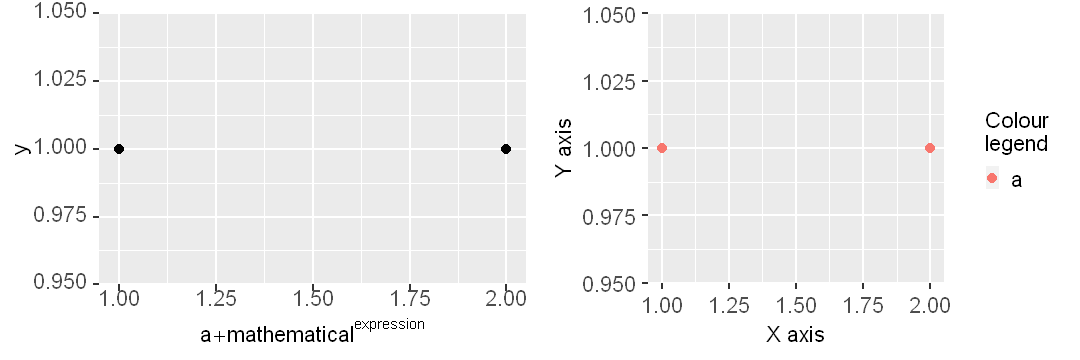

In [3]:
df <- data.frame(x = 1:2, y = 1, z = "a")
p <- ggplot(df, aes(x, y)) + geom_point()+myTheme

p1 <- p + scale_x_continuous(quote(a + mathematical ^ expression))

p <- ggplot(df, aes(x, y)) + geom_point(aes(colour = z))+myTheme
p2 <- p + labs(x = "X axis", y = "Y axis", colour = "Colour\nlegend")

multiplot(p1,p2,ncol = 2)

To remove the axis label, set it to `""` and leave the space, or `NULL` and remove the space

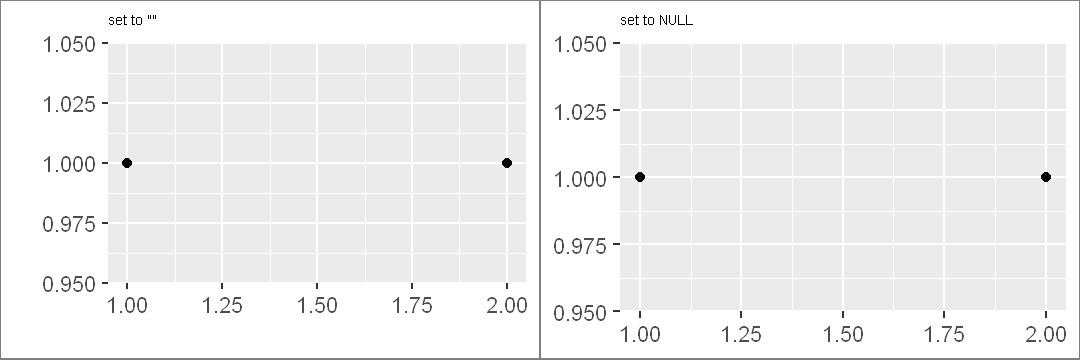

In [4]:
p <- ggplot(df, aes(x, y)) + 
  geom_point() + 
  theme(plot.background = element_rect(colour = "grey50")) + myTheme
p1 <- p + labs(x = "",  y = "") + ggtitle("set to \"\"")
p2 <- p + labs(x = NULL, y = NULL) + ggtitle("set to NULL")
multiplot(p1,p2,ncol=2)

### Breaks and labels

If `breaks` is changed, to align this with the label, change the `labels` as well.

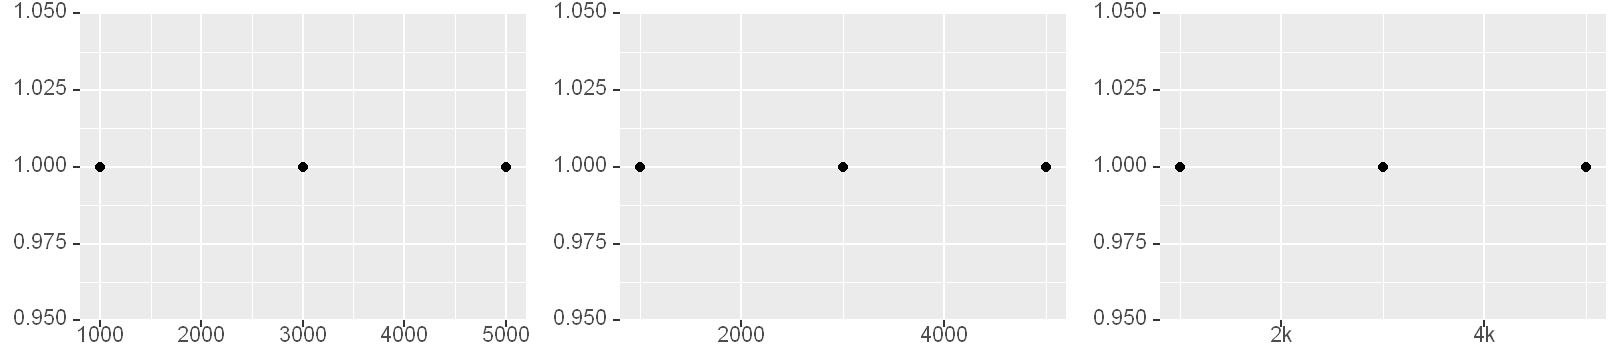

In [5]:
df <- data.frame(x = c(1, 3, 5) * 1000, y = 1)
axs <- ggplot(df, aes(x, y)) + 
geom_point() + 
labs(x = NULL, y = NULL) + myTheme
axs2 <- axs + scale_x_continuous(breaks = c(2000, 4000))
axs3 <- axs + scale_x_continuous(breaks = c(2000, 4000), labels = c("2k", "4k"))

multiplot(axs,axs2,axs3,ncol=3)

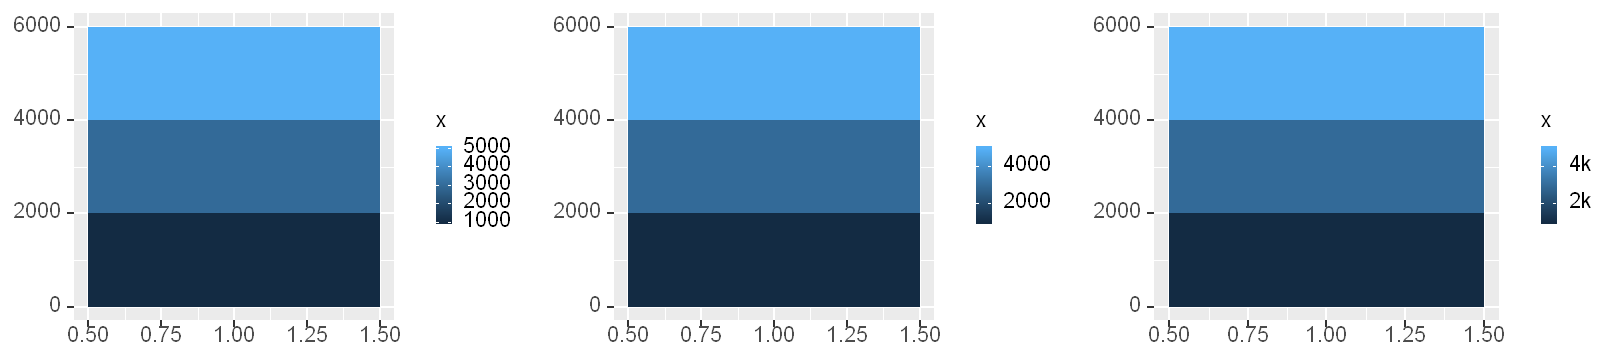

In [6]:
leg <- ggplot(df, aes(y, x, fill = x)) + 
geom_tile() + 
labs(x = NULL, y = NULL) + myTheme

leg2 <- leg + scale_fill_continuous(breaks = c(2000, 4000))
leg3 <- leg + scale_fill_continuous(breaks = c(2000, 4000), labels = c("2k", "4k"))

multiplot(leg,leg2,leg3,ncol = 3)

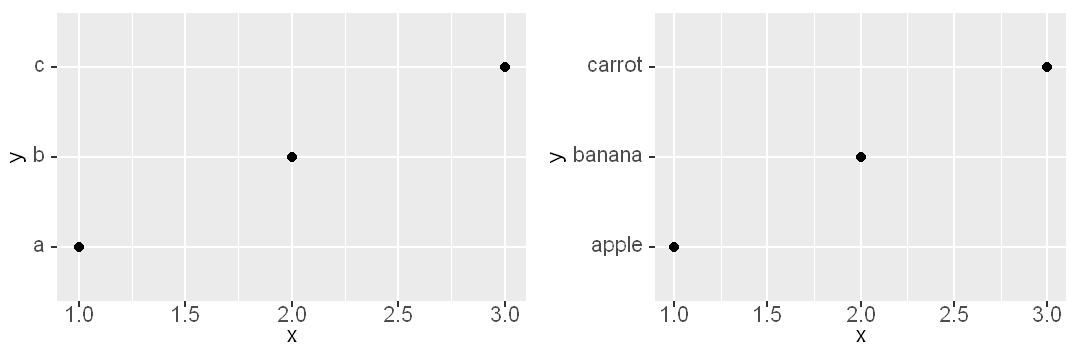

In [7]:
df2 <- data.frame(x = 1:3, y = c("a", "b", "c"))
p1 <- ggplot(df2, aes(x, y)) + 
geom_point() + myTheme
p2 <- ggplot(df2, aes(x, y)) + 
geom_point() + 
scale_y_discrete(labels = c(a = "apple", b = "banana", c = "carrot")) + myTheme

multiplot(p1,p2,ncol = 2)

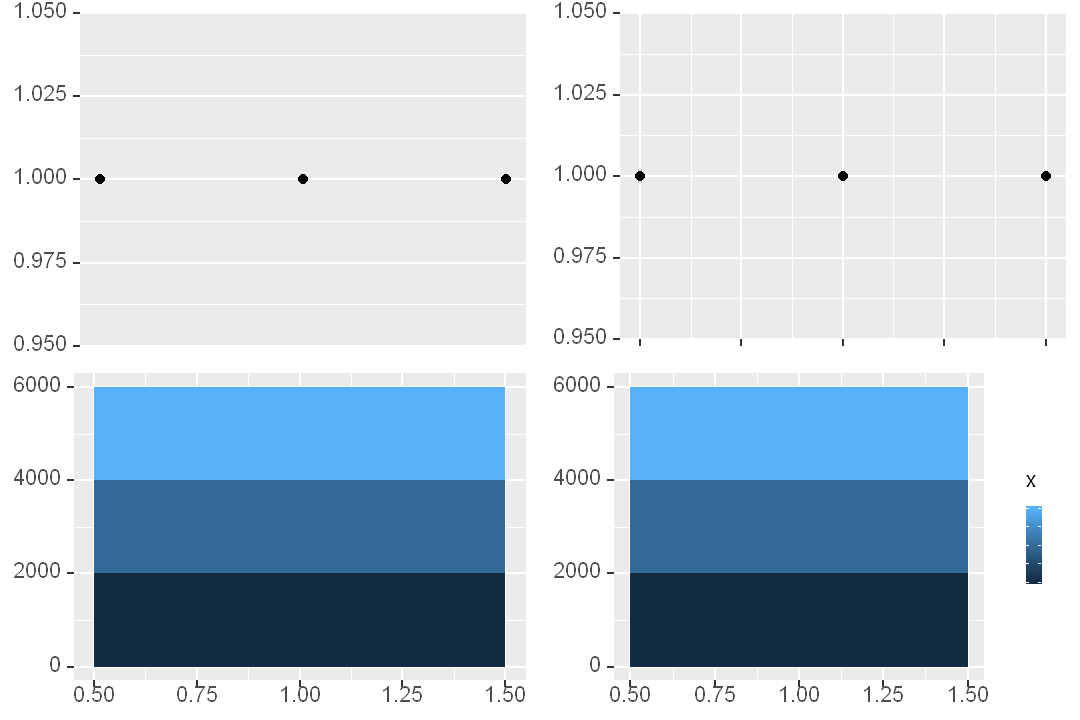

In [8]:
p1 <- axs + scale_x_continuous(breaks = NULL)
p2 <- axs + scale_x_continuous(labels = NULL)
p3 <- leg + scale_fill_continuous(breaks = NULL)
p4 <- leg + scale_fill_continuous(labels = NULL)

multiplot(p1,p2,p3,p4,ncol=2)

Another useful package `scales`

- `scales::comma_format()` adds commas to make it easier to read large numbers
- `scales::unit_format(unit, scale)` adds a unit suffix, optionally scaling
- `scales::dollar_format(prefix, suffix)` displays currency values, rounding to two decimal places and adding a prefix or suffix
- `scales::wrap_format()` wraps long labels into multiple lines

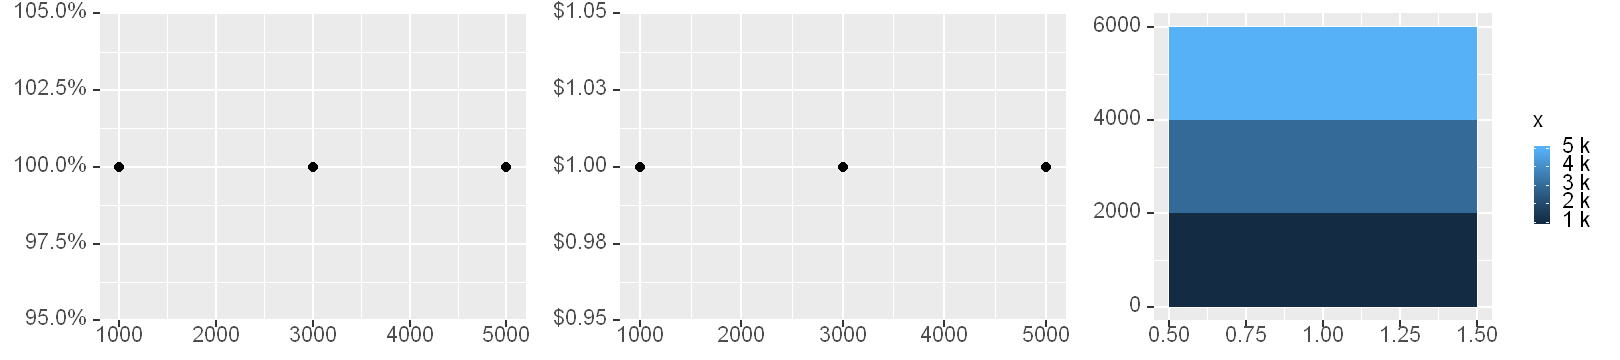

In [9]:
p1 <- axs + scale_y_continuous(labels = scales::percent_format())
p2 <- axs + scale_y_continuous(labels = scales::dollar_format(prefix = "$"))
p3 <- leg + scale_fill_continuous(labels = scales::unit_format(unit = "k", scale = 1e-3))
multiplot(p1,p2,p3,ncol = 3)

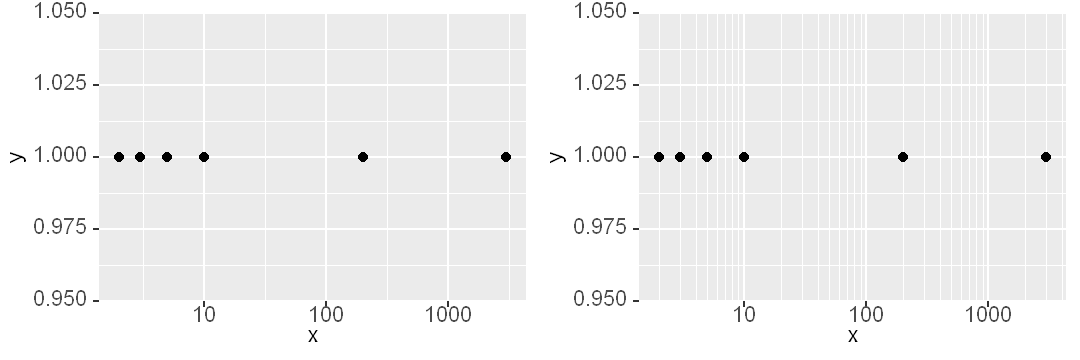

In [10]:
df <- data.frame(x = c(2, 3, 5, 10, 200, 3000), y = 1)
p1 <- ggplot(df, aes(x, y)) + 
geom_point() + 
scale_x_log10() + myTheme

mb <- as.numeric(1:10 %o% 10 ^ (0:4))
p2 <- ggplot(df, aes(x, y)) + 
geom_point() + 
scale_x_log10(minor_breaks = mb) + myTheme

multiplot(p1,p2,ncol=2)

Here `%o%` is the outer product of arrays

In [11]:
1:10 %o% 10 ^ (0:4)
as.numeric(1:10 %o% 10 ^ (0:4))

1,10,100,1000,1e+04
2,20,200,2000,2e+04
3,30,300,3000,3e+04
4,40,400,4000,4e+04
5,50,500,5000,5e+04
6,60,600,6000,6e+04
7,70,700,7000,7e+04
8,80,800,8000,8e+04
9,90,900,9000,9e+04
10,100,1000,10000,1e+05


[1] 1e+00 2e+00 3e+00 4e+00 5e+00 6e+00 7e+00 8e+00 9e+00 1e+01 1e+01 2e+01
[13] 3e+01 4e+01 5e+01 6e+01 7e+01 8e+01 9e+01 1e+02 1e+02 2e+02 3e+02 4e+02
[25] 5e+02 6e+02 7e+02 8e+02 9e+02 1e+03 1e+03 2e+03 3e+03 4e+03 5e+03 6e+03
[37] 7e+03 8e+03 9e+03 1e+04 1e+04 2e+04 3e+04 4e+04 5e+04 6e+04 7e+04 8e+04
[49] 9e+04 1e+05

## Legends

### Layers and legends

Use `show.legend: FALSE` to prevent a layer from appearing in the legend, and `TRUE` to force it to appear

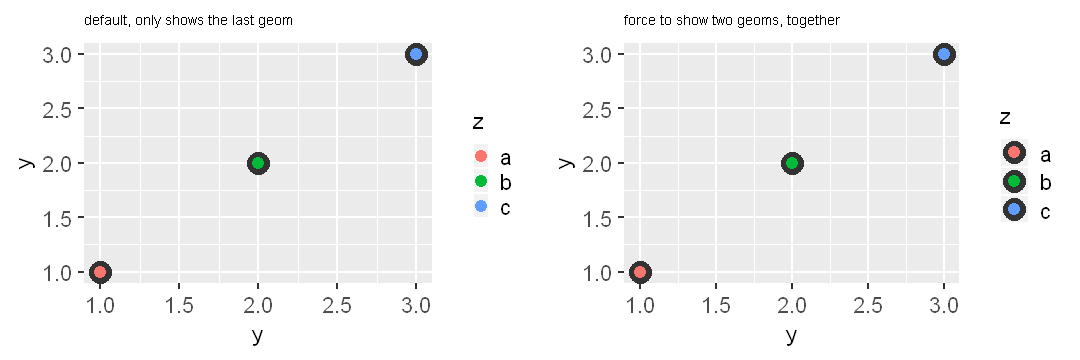

In [12]:
df <- data.frame(x=c(1,2,3),y=c(1,2,3),z=c("a","b","c"))
p1 <- ggplot(df, aes(y, y)) + 
geom_point(size = 4, colour = "grey20") +
geom_point(aes(colour = z), size = 2) +myTheme +
ggtitle("default, only shows the last geom")
p2 <- ggplot(df, aes(y, y)) + 
geom_point(size = 4, colour = "grey20", show.legend = TRUE) +
geom_point(aes(colour = z), size = 2) +myTheme + 
ggtitle("force to show two geoms, together")

multiplot(p1,p2,ncol = 2)

We can also see that `ggplot2` tries to use the fewest number of legends to accurately convey the aesthetics used in the plot. That's why the two geoms will be merged together. Note that they have to share the same `name` (Here it's `z`). See the following for another example.

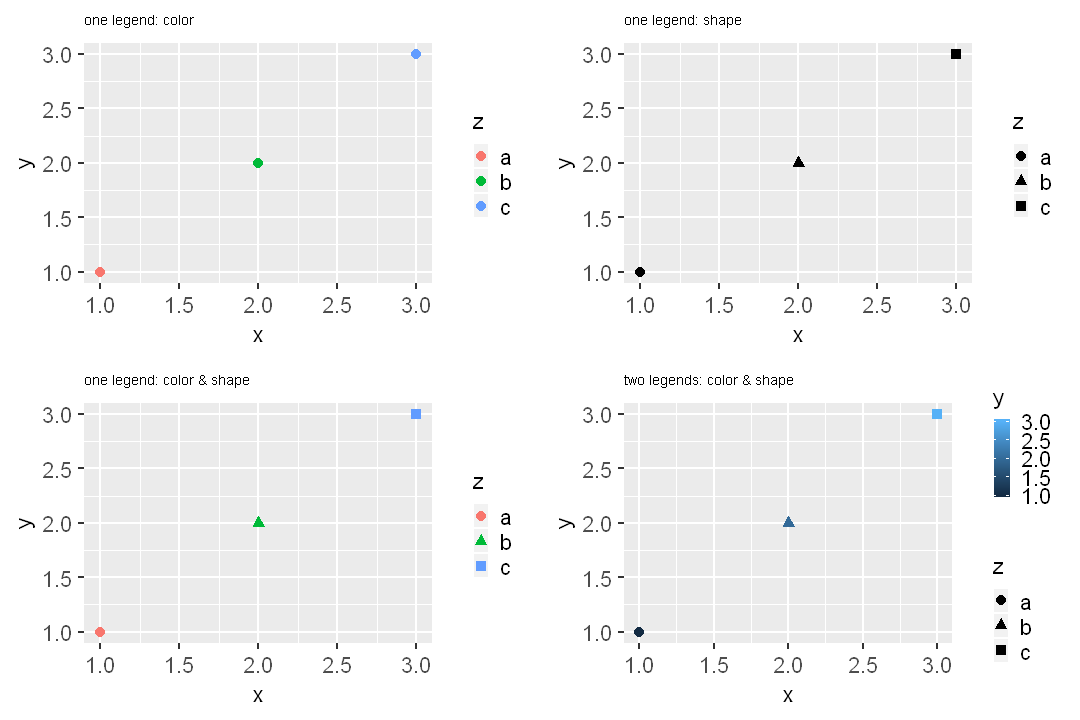

In [13]:
p1 <- ggplot(df, aes(x, y)) + geom_point(aes(colour = z)) + myTheme + ggtitle('one legend: color')
p2 <- ggplot(df, aes(x, y)) + geom_point(aes(shape = z)) + myTheme + ggtitle('one legend: shape')
p3 <- ggplot(df, aes(x, y)) + geom_point(aes(shape = z, colour = z)) + myTheme + ggtitle('one legend: color & shape')
p4 <- ggplot(df, aes(x, y)) + geom_point(aes(shape = z, colour = y)) + myTheme + ggtitle('two legends: color & shape')
multiplot(p1,p2,p3,p4,ncol = 2)

And geoms in the legend can be different to the geoms in the plot

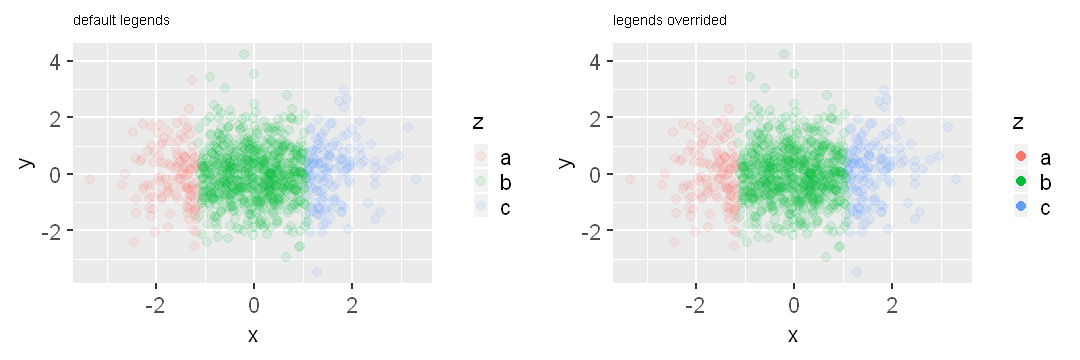

In [14]:
norm <- data.frame(x = rnorm(1000), y = rnorm(1000))
norm$z <- cut(norm$x, 3, labels = c("a", "b", "c"))
p1 <- ggplot(norm, aes(x, y)) + 
geom_point(aes(colour = z), alpha = 0.1) + myTheme + 
ggtitle('default legends')
p2 <- ggplot(norm, aes(x, y)) + 
geom_point(aes(colour = z), alpha = 0.1) + 
guides(colour = guide_legend(override.aes = list(alpha = 1))) + myTheme + 
ggtitle('legends overrided')

multiplot(p1,p2,ncol = 2)

### Legend layout

Use `theme()`, more in Chap15

- `legend.position`: `right`, `left`, `top`, `bottom`, or `none`, also take `c(XPosition,YPosition)` where `Position` is a percent number
- `legend.direction`: layout of items in legends: `horizontal`, `vertical`
- `legend.box`: arrangement of multiple legends: `horizontal`, `vertical`
- `legend.box.just`: justification of each legend within the overall bounding box, when there are multiple legends: `right`, `left`, `top`, `bottom`
- `legend.justification`: the refering point of `legend.position` , `c(X%,Y%)` where the percent numbers start from bottom left corner
- `legend.margin`: `unit(unitNum, unitName)`, for example, `unit(0, "mm")`

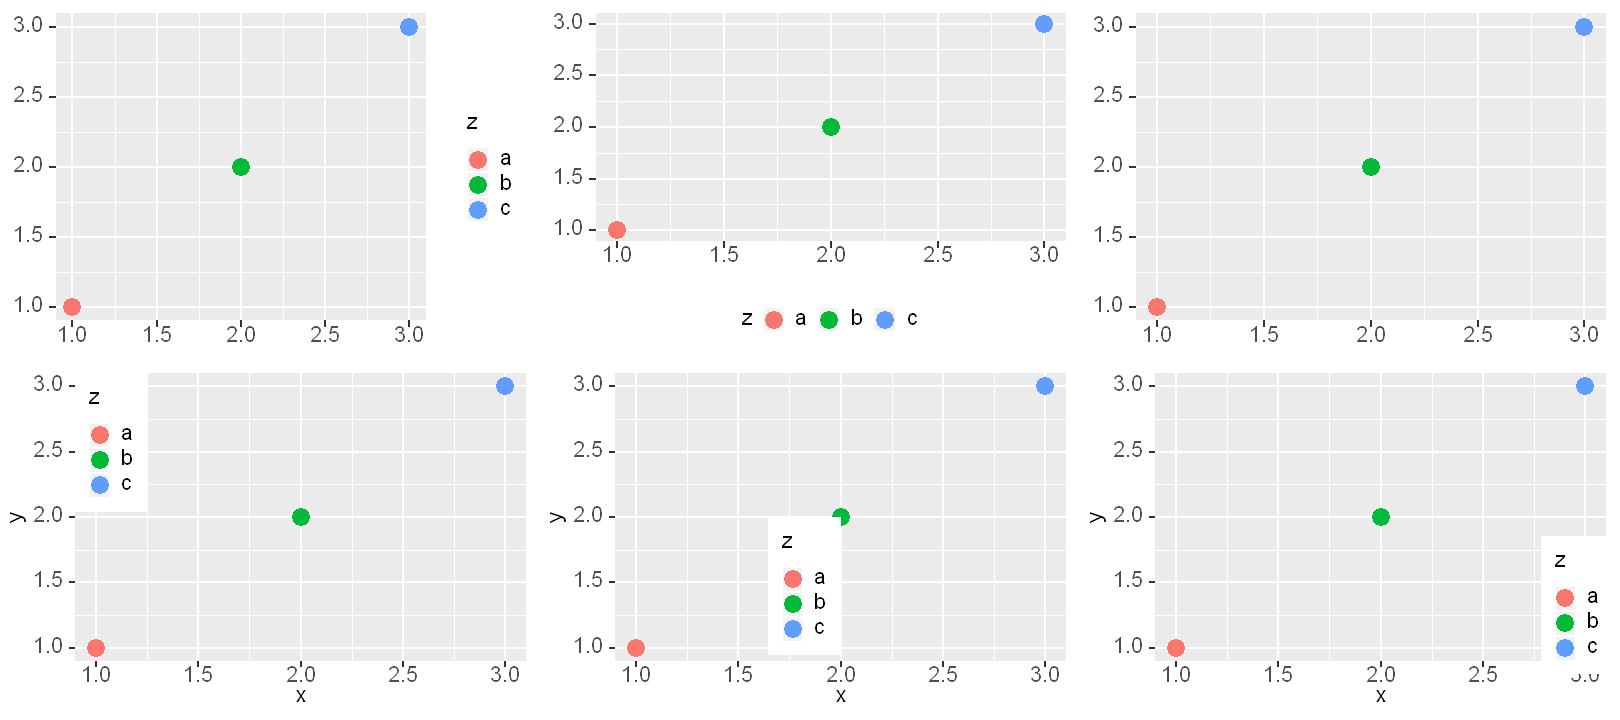

In [15]:
df <- data.frame(x = 1:3, y = 1:3, z = c("a", "b", "c"))
base <- ggplot(df, aes(x, y)) + 
  geom_point(aes(colour = z), size = 3) + 
  xlab(NULL) + 
  ylab(NULL) + myTheme

p1 <- base + theme(legend.position = "right") # the default 
p2 <- base + theme(legend.position = "bottom")
p3 <- base + theme(legend.position = "none")

base <- ggplot(df, aes(x, y)) + 
geom_point(aes(colour = z), size = 3) + myTheme

p4 <- base + theme(legend.position = c(0, 1), legend.justification = c(0, 1))
p5 <- base + theme(legend.position = c(0.5, 0.5), legend.justification = c(1, 1))
p6 <- base + theme(legend.position = c(1, 0), legend.justification = c(0.9, 0.1))

multiplot(p1,p2,p3,p4,p5,p6,ncol = 3)

### Guide functions

Assign `guide` argument of the corresponding scale function to `guide_colourbar()` and `guide_legend()`, or just use `guides()`.

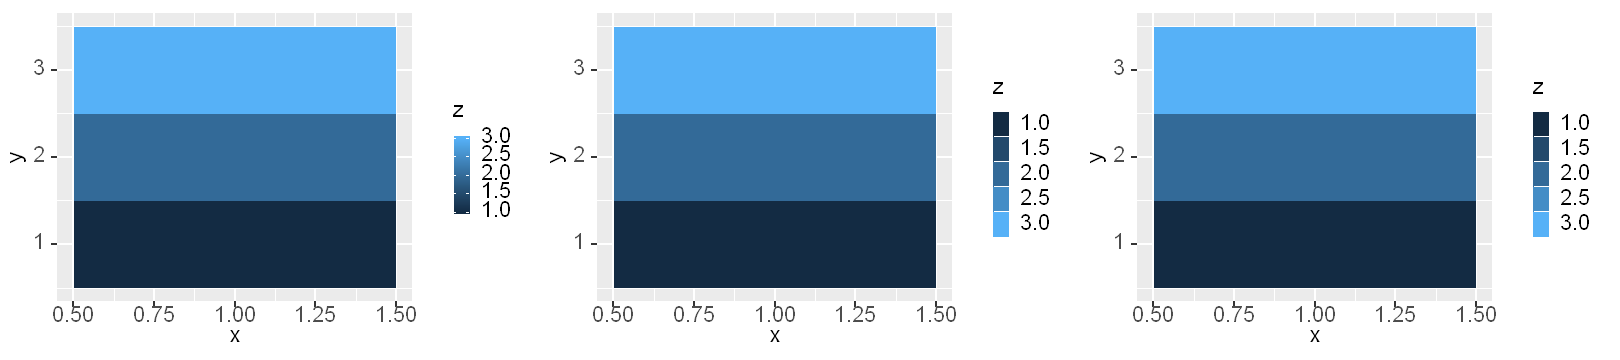

In [16]:
df <- data.frame(x = 1, y = 1:3, z = 1:3)
base <- ggplot(df, aes(x, y)) + geom_raster(aes(fill = z)) +myTheme
base2 <- base + scale_fill_continuous(guide = guide_legend())
base3 <- base + guides(fill = guide_legend())

multiplot(base,base2,base3,ncol = 3)

### guide_legend()

Use `guides(fill = guide_legend(...))`

- `nrow` or `ncol` specify the dimensions of the table
- `byrow` controls how the table is filled: `FALSE` fills it by column (the default)
- `reverse`: `TRUE` to reverse the order of the keys. Default stacking for bar plot and legend orders are different
- `override.aea` override the aesthetic settings, see above
- `keywidth` and `keyheight` specify the size of the keys, in `unit()`

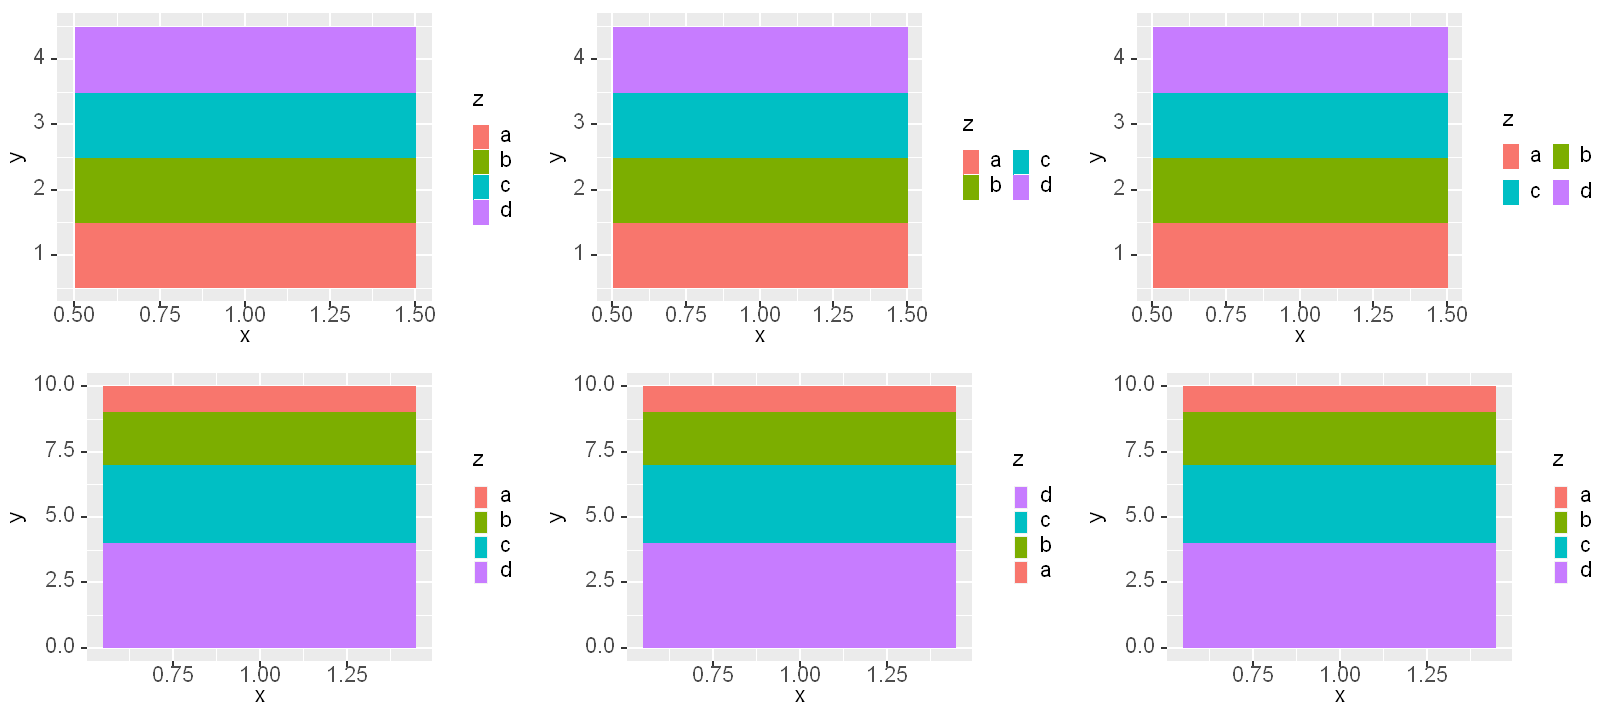

In [20]:
df <- data.frame(x = 1, y = 1:4, z = letters[1:4])
p <- ggplot(df, aes(x, y)) + geom_raster(aes(fill = z)) + myTheme
p2 <- p + guides(fill = guide_legend(ncol = 2))
p3 <- p + guides(fill = guide_legend(ncol = 2, byrow = TRUE))

p4 <- ggplot(df, aes(1, y)) + geom_bar(stat = "identity", aes(fill = z)) + myTheme
p5 <- p4 + guides(fill = guide_legend(reverse = TRUE))
p6 <- p4 + guides(keywidth=unit(2,'mm'))

multiplot(p,p2,p3,p4,p5,p6,ncol=3)

### guide_colourbar()

Use `guides(fill = guide_colorbar(...))`

- `barwidth` and `barheight`, with `unit()`
-  `nbin` controls the number of slices
- `reverse` flips the colour bar, with the lowest values at the top. 

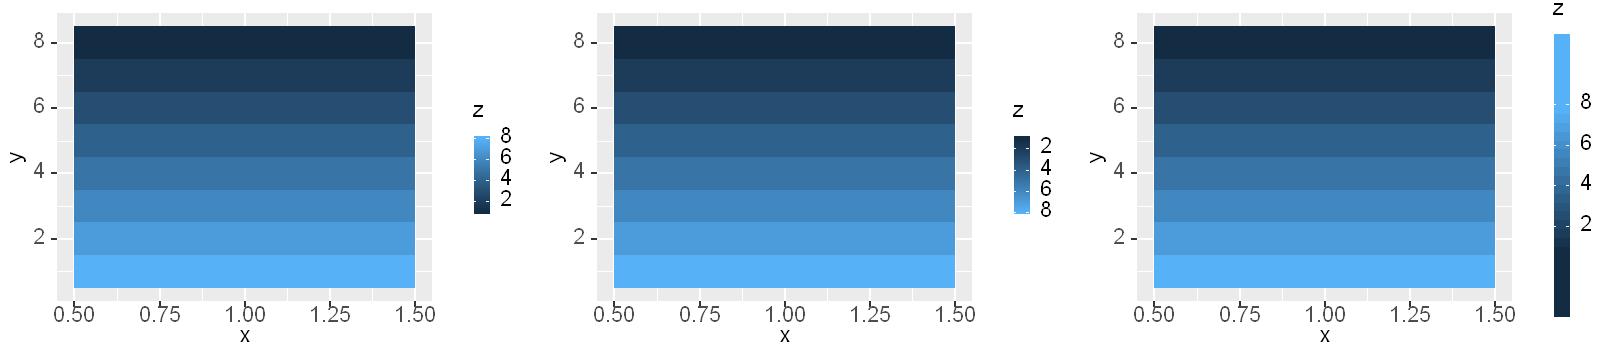

In [29]:
df <- data.frame(x = 1, y = 1:8, z = 8:1)
p <- ggplot(df, aes(x, y)) + geom_tile(aes(fill = z)) + myTheme

p2 <- p + guides(fill = guide_colorbar(reverse = TRUE))
p3 <- p + guides(fill = guide_colorbar(nbin=2,barheight = unit(4, "cm")))

multiplot(p,p2,p3,ncol = 3)

## Limits

`limits`, a numeric vector of length two for continuous scales; a character vector which enumerates all possible values for discrete scales.

Warning message:
"Removed 2 rows containing missing values (geom_point)."

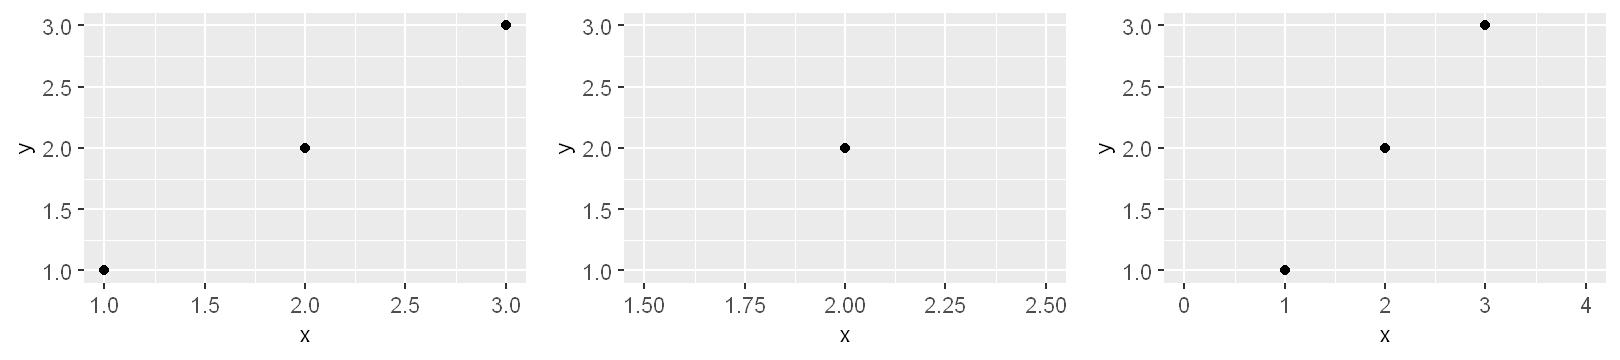

In [32]:
df <- data.frame(x = 1:3, y = 1:3)
base <- ggplot(df, aes(x, y)) + geom_point() + myTheme
base2 <- base + scale_x_continuous(limits = c(1.5, 2.5))
base3 <- base + scale_x_continuous(limits = c(0, 4))

multiplot(base,base2,base3,ncol=3)

Or use more direct functions `xlim()`, `ylim()` and `lims()`

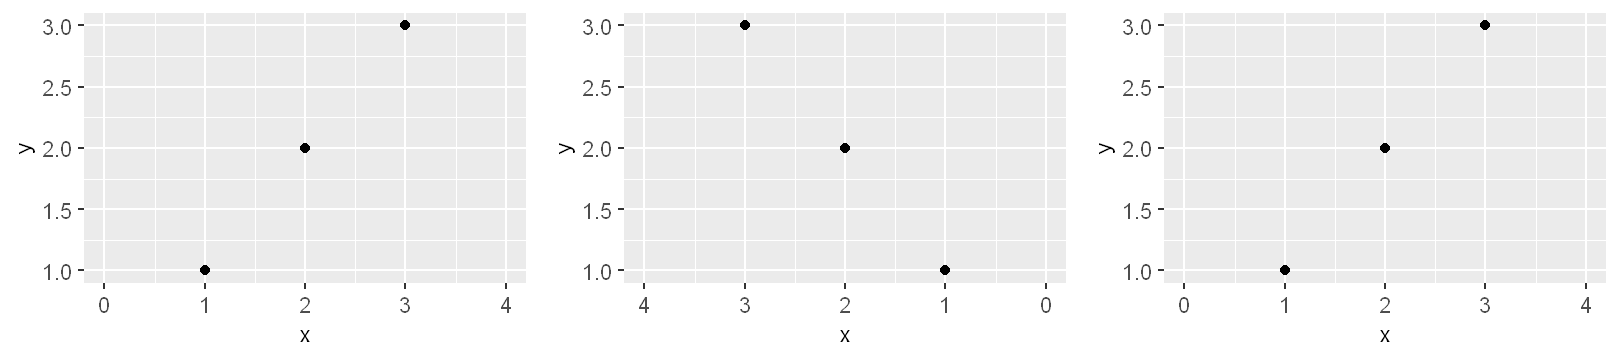

In [33]:
p1 <- base + xlim(0, 4)
p2 <- base + xlim(4, 0)
p3 <- base + lims(x = c(0, 4))

multiplot(p1,p2,p3,ncol = 3)

The range of the axes will exceed the limit, to get rid of that, set `expand = c(0, 0)`

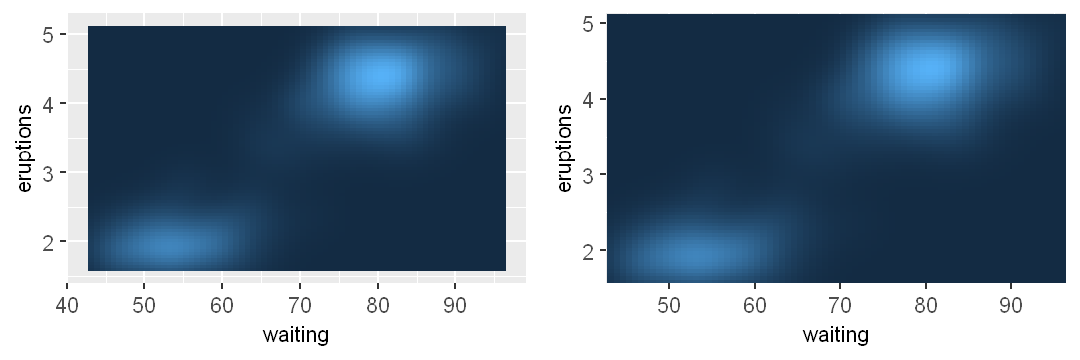

In [34]:
p1 <- ggplot(faithfuld, aes(waiting, eruptions)) + 
geom_raster(aes(fill = density)) + 
theme(legend.position = "none") + myTheme
p2 <- ggplot(faithfuld, aes(waiting, eruptions)) + 
geom_raster(aes(fill = density)) + 
scale_x_continuous(expand = c(0,0)) + 
scale_y_continuous(expand = c(0,0)) +
theme(legend.position = "none") + myTheme

multiplot(p1,p2,ncol = 2)

For out of bound values, by default, ggplot use `scale_(oob = scales::squish)`. Change that with `scales::censor`

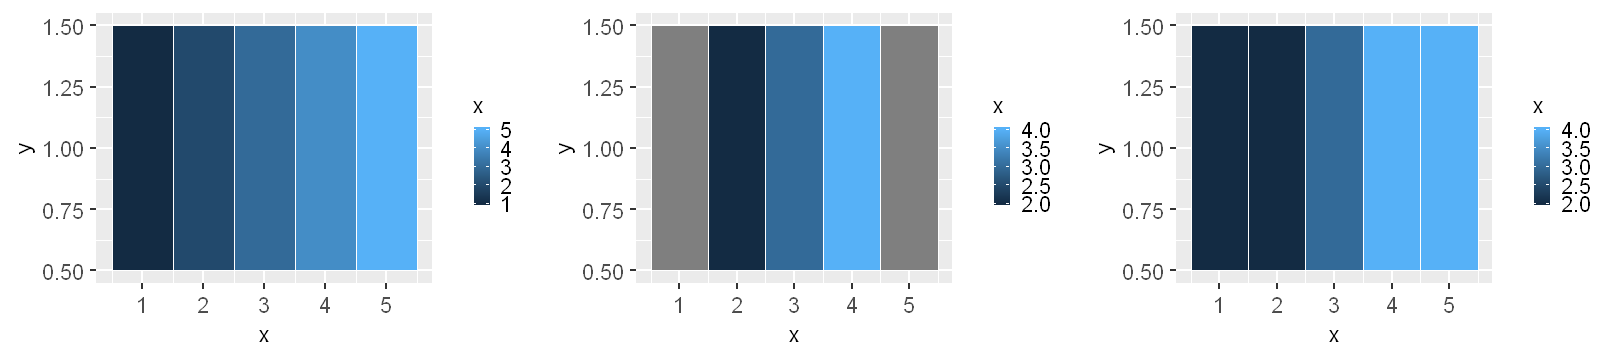

In [36]:
df <- data.frame(x = 1:5)
p <- ggplot(df, aes(x, 1)) + geom_tile(aes(fill = x), colour = "white") + myTheme
p1 <- p + scale_fill_gradient(limits = c(2, 4))
p2 <- p + scale_fill_gradient(limits = c(2, 4), oob = scales::squish)
multiplot(p,p1,p2,ncol = 3)

## Scales toolbox

- Continuous position scales: integer, numeric, and date/time data to x and y position
- Colour scales: continuous and discrete data to colours
- Manual scales: discrete variables to your choice of size, line type, shape or colour
- The identity scale, paradoxically used to plot variables without scaling them

### Continuous position scales

Commonly, `scale_x_continuous()` and `scale_y_continuous()`. Every continuous scale takes a `trans` argument, allowing the use of a variety of transformations:

|    Name    |    Function $f(x)$    | Inverse $f^{-1} (y)$ |
| :--------: | :-------------------: | :------------------: |
|    asn     |    $\tanh^{−1}(x)$    |      $\tanh(y)$      |
|    exp     |         $e^x$         |      $\log(y)$       |
|  identity  |           x           |          y           |
|    log     |       $\log(x)$       |        $e^y$         |
|   log10    |    $\log_{10}(x)$     |        $10^y$        |
|    log2    |     $\log_{2}(x)$     |        $2^y$         |
|   logit    | $\log(\frac{x}{1-x})$ | $\frac{e^y}{1+e^y}$  |
|   pow10    |        $10^x$         |    $\log_{10}(y)$    |
|   probit   |       $\Phi(x)$       |    $\Phi^{-1}(x)$    |
| reciprocal |       $x^{−1}$        |       $y^{−1}$       |
|  reverse   |          −x           |          -y          |
|    sqrt    |       $x^{1/2}$       |        $y^2$         |

Shortcuts are `scale_x_log10()`, `scale_x_sqrt()` and `scale_x_reverse()`.

And sure you can transform the data, then the axes will also be labelled in the transformed space. If transforming scales, then the axes will be labelled in the original data space.

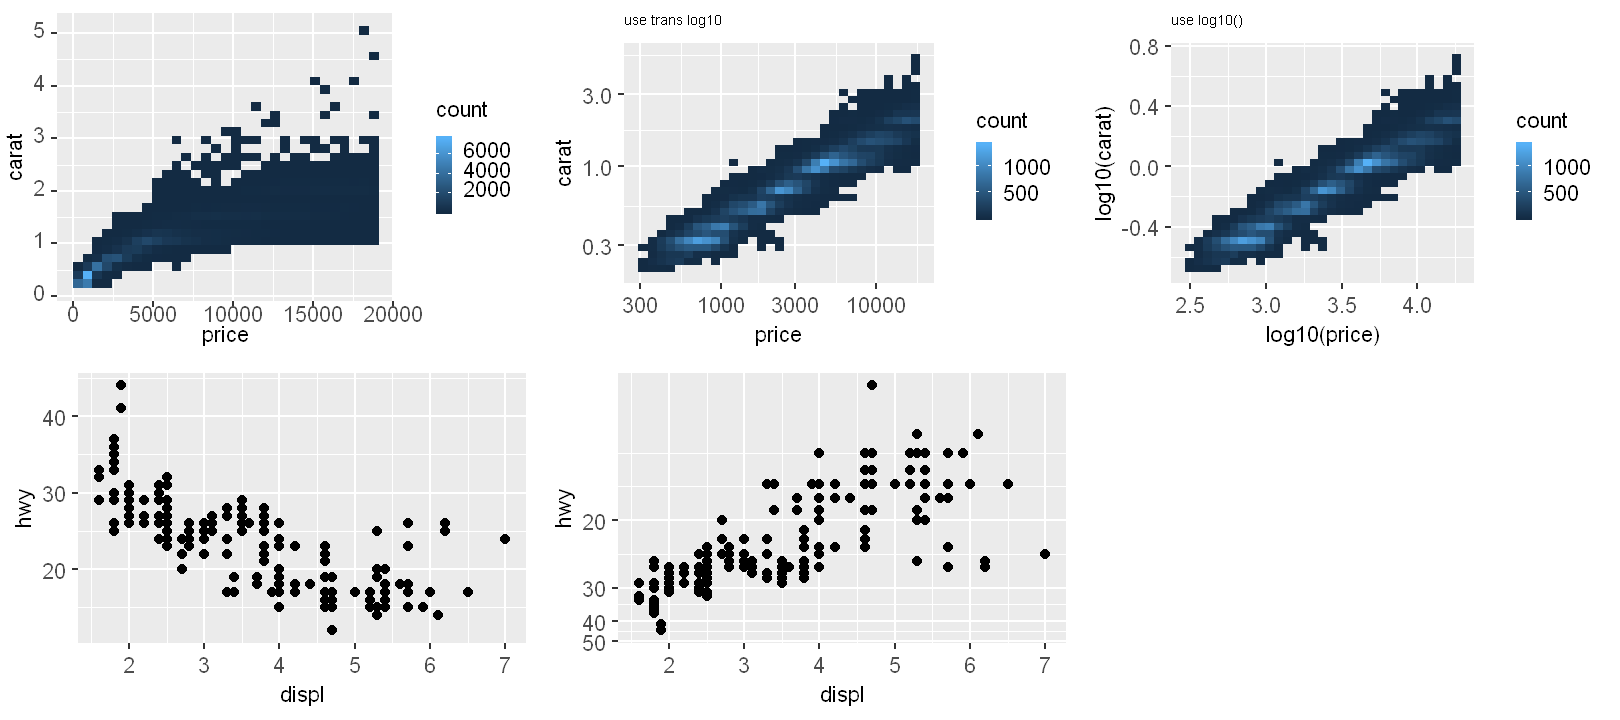

In [40]:
# Convert from fuel economy to fuel consumption
p1 <- ggplot(mpg, aes(displ, hwy)) + 
geom_point() + myTheme
p2 <- p1 + scale_y_continuous(trans = "reciprocal")

# Log transform x and y axes
p3 <- ggplot(diamonds, aes(price, carat)) + 
geom_bin2d() + myTheme
p4 <- p3 + 
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10") + ggtitle("use trans log10")
p5 <- ggplot(diamonds, aes(log10(price), log10(carat))) + 
geom_bin2d() + myTheme + ggtitle("use log10()")

multiplot(p3,p4,p5,p1,p2,ncol=3)

Date and date/time data are continuous variables. `scale_x_date()` and `scale_x_datetime()` work similarly to `scale_x_continuous()` but have special `date_breaks` and `date_labels` arguments

Convert dates to other formats using `as.Date()` or `as.POSIXct()`.

- set `date_breaks` or `date_minor_breaks` to date unit, for example, `"2 weeks"`
- `date_labels` controls what to display, using formatting strings as in `strptime()` and `format()`

| String | Meaning                            |
| :----: | :--------------------------------: |
| `%S`   | second (00-59)                     |
| `%M`   | minute (00-59)                     |
| `%l`   | hour, in 12-hour clock (1-12)      |
| `%I`   | hour, in 12-hour clock (01-12)     |
| `%p`   | am/pm                              |
| `%H`   | hour, in 24-hour clock (00-23)     |
| `%a`   | day of week, abbreviated (Mon-Sun) |
| `%A`   | day of week, full (Monday-Sunday)  |
| `%e`   | day of month (1-31)                |
| `%d`   | day of month (01-31)               |
| `%m`   | month, numeric (01-12)             |
| `%b`   | month, abbreviated (Jan-Dec)       |
| `%B`   | month, full (January-December)     |
| `%y`   | year, without century (00-99)      |
| `%Y`   | year, with century (0000-9999)     |

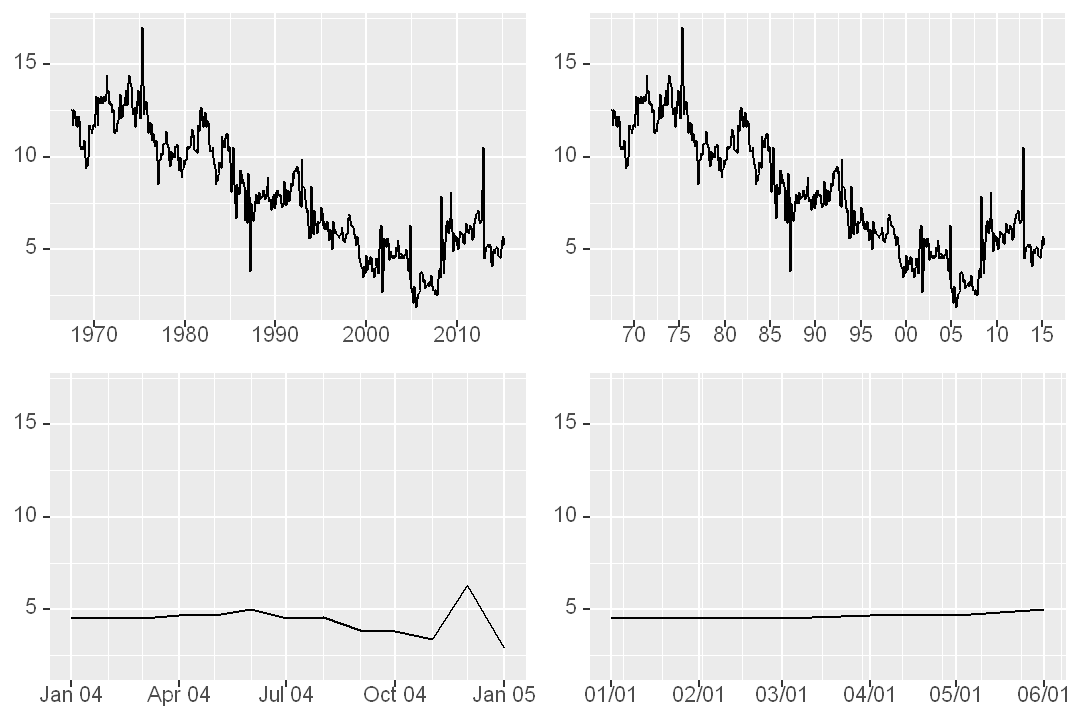

In [41]:
base <- ggplot(economics, aes(date, psavert)) + 
geom_line(na.rm = TRUE) +
labs(x = NULL, y = NULL) + myTheme

base2 <- base + scale_x_date(date_labels = "%y", date_breaks = "5 years")

base3 <- base + scale_x_date(
    limits = as.Date(c("2004-01-01", "2005-01-01")),
    date_labels = "%b %y",
    date_minor_breaks = "1 month"
)
base4 <- base + scale_x_date(
    limits = as.Date(c("2004-01-01", "2004-06-01")),
    date_labels = "%m/%d",
    date_minor_breaks = "2 weeks"
)

multiplot(base,base2,base3,base4,ncol = 2)

### Colour

#### Continuous

- `scale_colour_gradient()` and `scale_fill_gradient()`, two-colour gradient, same as `scale_colour_continuous()`. Arguments `low` and `high` control the colours at either end of the gradient
- `scale_colour_gradient2()` and `scale_fill_gradient2()`, three-colour gradient. Take arguments `low`, `high` and `midpoint`
- `scale_colour_gradientn()` and `scale_fill_gradientn()`, custom n-colour gradient
- `scale_color_distiller()` and `scale_fill_distiller()`, use it like `scale_fill_brewer()`

All continuous colour scales have an `na.value` parameter for missing values and values outside the range of the scale limits

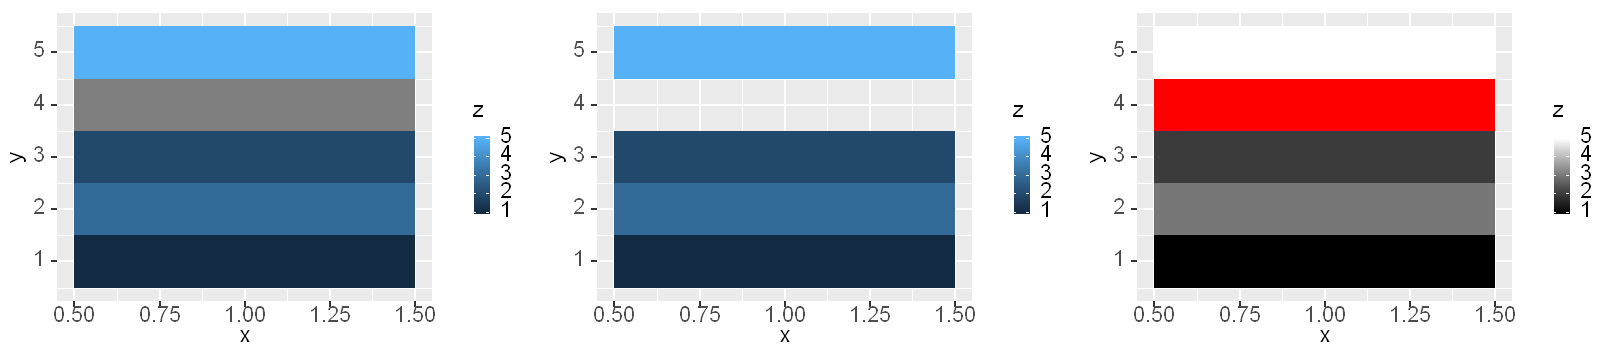

In [44]:
df <- data.frame(x = 1, y = 1:5, z = c(1, 3, 2, NA, 5))
p <- ggplot(df, aes(x, y)) + geom_tile(aes(fill = z), size = 5) + myTheme
p1 <- p + scale_fill_gradient(na.value = NA)
p2 <- p + scale_fill_gradient(low = "black", high = "white", na.value = "red")

multiplot(p,p1,p2,ncol = 3)

#### Discrete

- default, `scale_colour_hue()`, with the `h`, `c`, `l` arguments. All with same `l` and `c` and cannot be distinguished on print paper
- `scale_colour_brewer()` uses handpicked "ColorBrewer" colours
- `scale_colour_grey()` maps discrete data to grays
- `scale_colour_manual()` for your own discrete colour palette

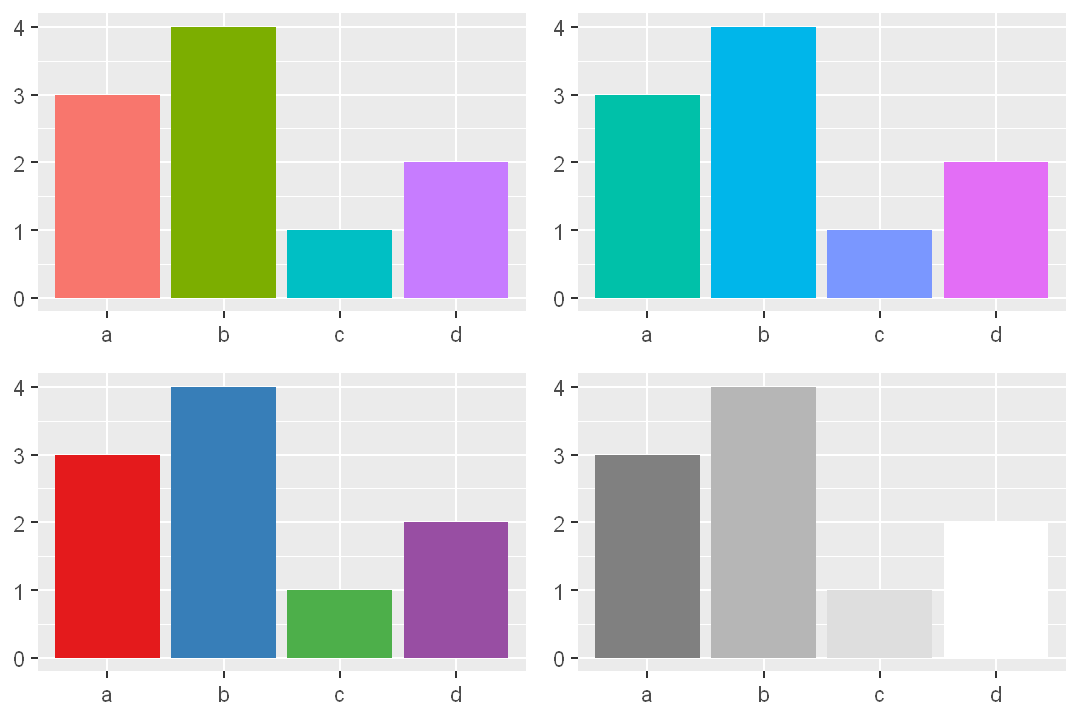

In [46]:
df <- data.frame(x = c("a", "b", "c", "d"), y = c(3, 4, 1, 2))
bars <- ggplot(df, aes(x, y, fill = x)) + 
geom_bar(stat = "identity") + 
labs(x = NULL, y = NULL) +
theme(legend.position = "none") + myTheme

bars2 <- bars + scale_fill_hue(h = c(180, 300))
bars3 <- bars + scale_fill_brewer(palette = "Set1")
bars4 <- bars + scale_fill_grey(start = 0.5, end = 1)

multiplot(bars,bars2,bars3,bars4,ncol=2)

#### The manual discrete scale

Basically there's no option for some discrete scales, for example `scale_linetype()`, `scale_shape()`, and `scale_colour_discrete()`, thus we create our own with `scale_linetype_manual()`, `scale_shape_manual()`, `scale_colour_manual()`



Warning message:
"Removed 27 rows containing missing values (geom_point)."Warning message:
"Removed 32 rows containing missing values (geom_point)."

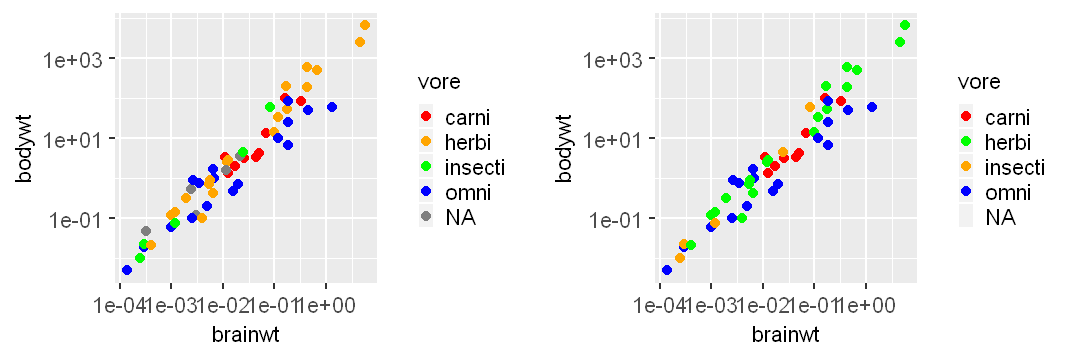

In [48]:
plot <- ggplot(msleep, aes(brainwt, bodywt)) + 
  scale_x_log10() + 
  scale_y_log10() + myTheme
plot2 <- plot + 
geom_point(aes(colour = vore)) + 
scale_colour_manual(
    values = c("red", "orange", "green", "blue"), 
    na.value = "grey50"
)

colours <- c(
carni = "red", 
insecti = "orange", 
herbi = "green", 
omni = "blue"
)
plot3 <- plot + 
geom_point(aes(colour = vore)) + 
scale_colour_manual(values = colours)

multiplot(plot2,plot3,ncol=2)

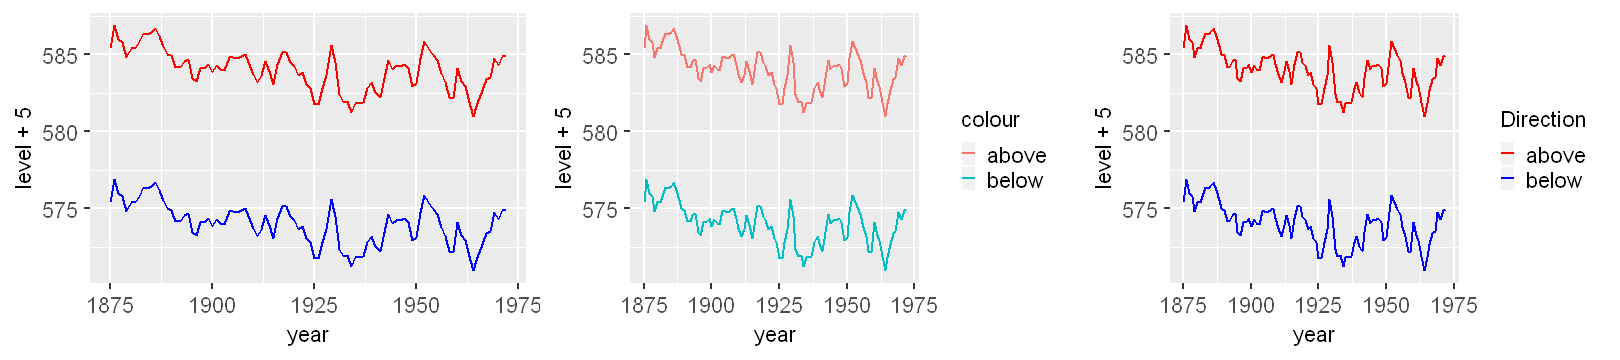

In [50]:
huron <- data.frame(year = 1875:1972, level = as.numeric(LakeHuron))
p1 <- ggplot(huron, aes(year)) +
geom_line(aes(y = level + 5), colour = "red") +
geom_line(aes(y = level - 5), colour = "blue") + myTheme

p2 <- ggplot(huron, aes(year)) +
geom_line(aes(y = level + 5, colour = "above")) +
geom_line(aes(y = level - 5, colour = "below")) + myTheme

p3 <- ggplot(huron, aes(year)) +
geom_line(aes(y = level + 5, colour = "above")) + 
geom_line(aes(y = level - 5, colour = "below")) + 
scale_colour_manual("Direction", 
    values = c("above" = "red", "below" = "blue")
)+ myTheme

multiplot(p1,p2,p3,ncol = 3)

#### The identity scale

when the data and aesthetic spaces are the same.

L,u,v,col
9341.570,-3.370649e-12,0.0000,white
9100.962,-4.749170e+02,-635.3502,aliceblue
8809.518,1.008865e+03,1668.0042,antiquewhite
8935.225,1.065698e+03,1674.5948,antiquewhite1
8452.499,1.014911e+03,1609.5923,antiquewhite2
7498.378,9.029892e+02,1401.7026,antiquewhite3


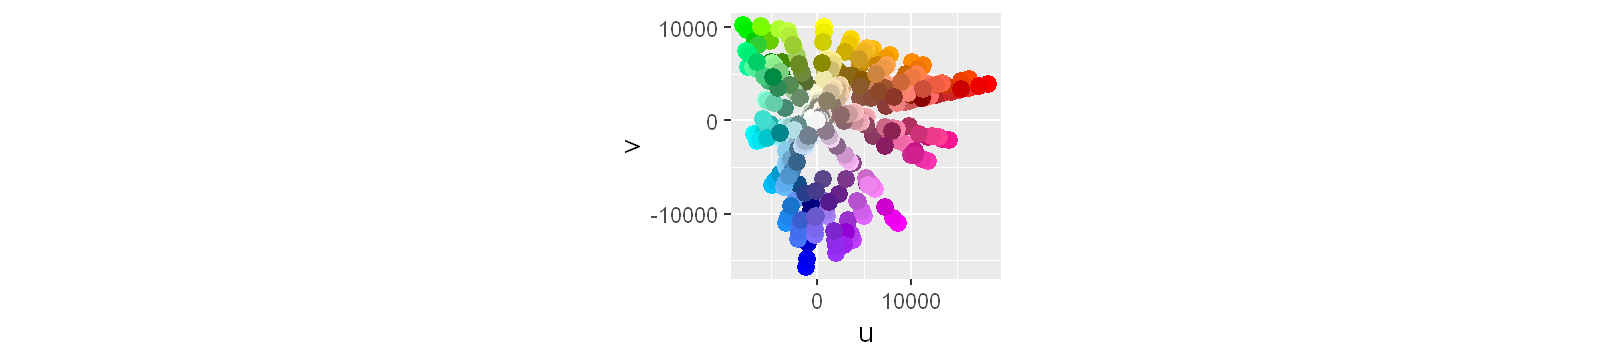

In [51]:
head(luv_colours)

ggplot(luv_colours, aes(u, v)) + 
geom_point(aes(colour = col), size = 3) + 
scale_color_identity() + 
coord_equal()